In [1]:
# Import our parser modules
from mcnpy.endf.read_endf import read_endf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the path to our test file
endf_filepath = '/home/MONLEON-JUAN/MCNPy/mcnpy/endf/files/n-026_Fe_056.endf'
endf_filepath = '/soft_snc/lib/endf/jeff32/neutrons/260560_32.endf'

pierre_endf = '/soft_snc/lib/endf/jeff40/neutrons/13-Al-26g.txt'

In [3]:
# Read only MF4 sections
endf = read_endf(pierre_endf)

/home/MONLEON-JUAN/MCNPy/mcnpy/endf/parsers/parse_endf.py:83: UserWarning: Skipping MF sections without parsers: [2, 3, 6, 8, 10, 12, 14, 32, 33, 40]. Only parsing: [1, 4, 34]
  warnings.warn(f"Skipping MF sections without parsers: {skipped_mfs}. Only parsing: {parseable_mfs}")


In [4]:
mf34 = endf.mf[34]

In [5]:
ang_cov = mf34.to_ang_covmat()

In [6]:
ang_cov

                  MF34 Angular Distribution Covariance Information                   

This object contains covariance matrix data for angular distributions (MF34).
Each matrix represents the covariance between Legendre coefficients for specific
isotope-reaction pairs across energy groups.

MF34 Covariance Data Summary:
-------------------------------------------------------------------------------------
Property                            Value                                          
-------------------------------------------------------------------------------------
Number of Covariance Matrices       21                                             
Number of Unique Isotopes           1                                              
Number of Unique Reactions          1                                              
Number of Unique Legendre Indices   6                                              
-------------------------------------------------------------------------------------


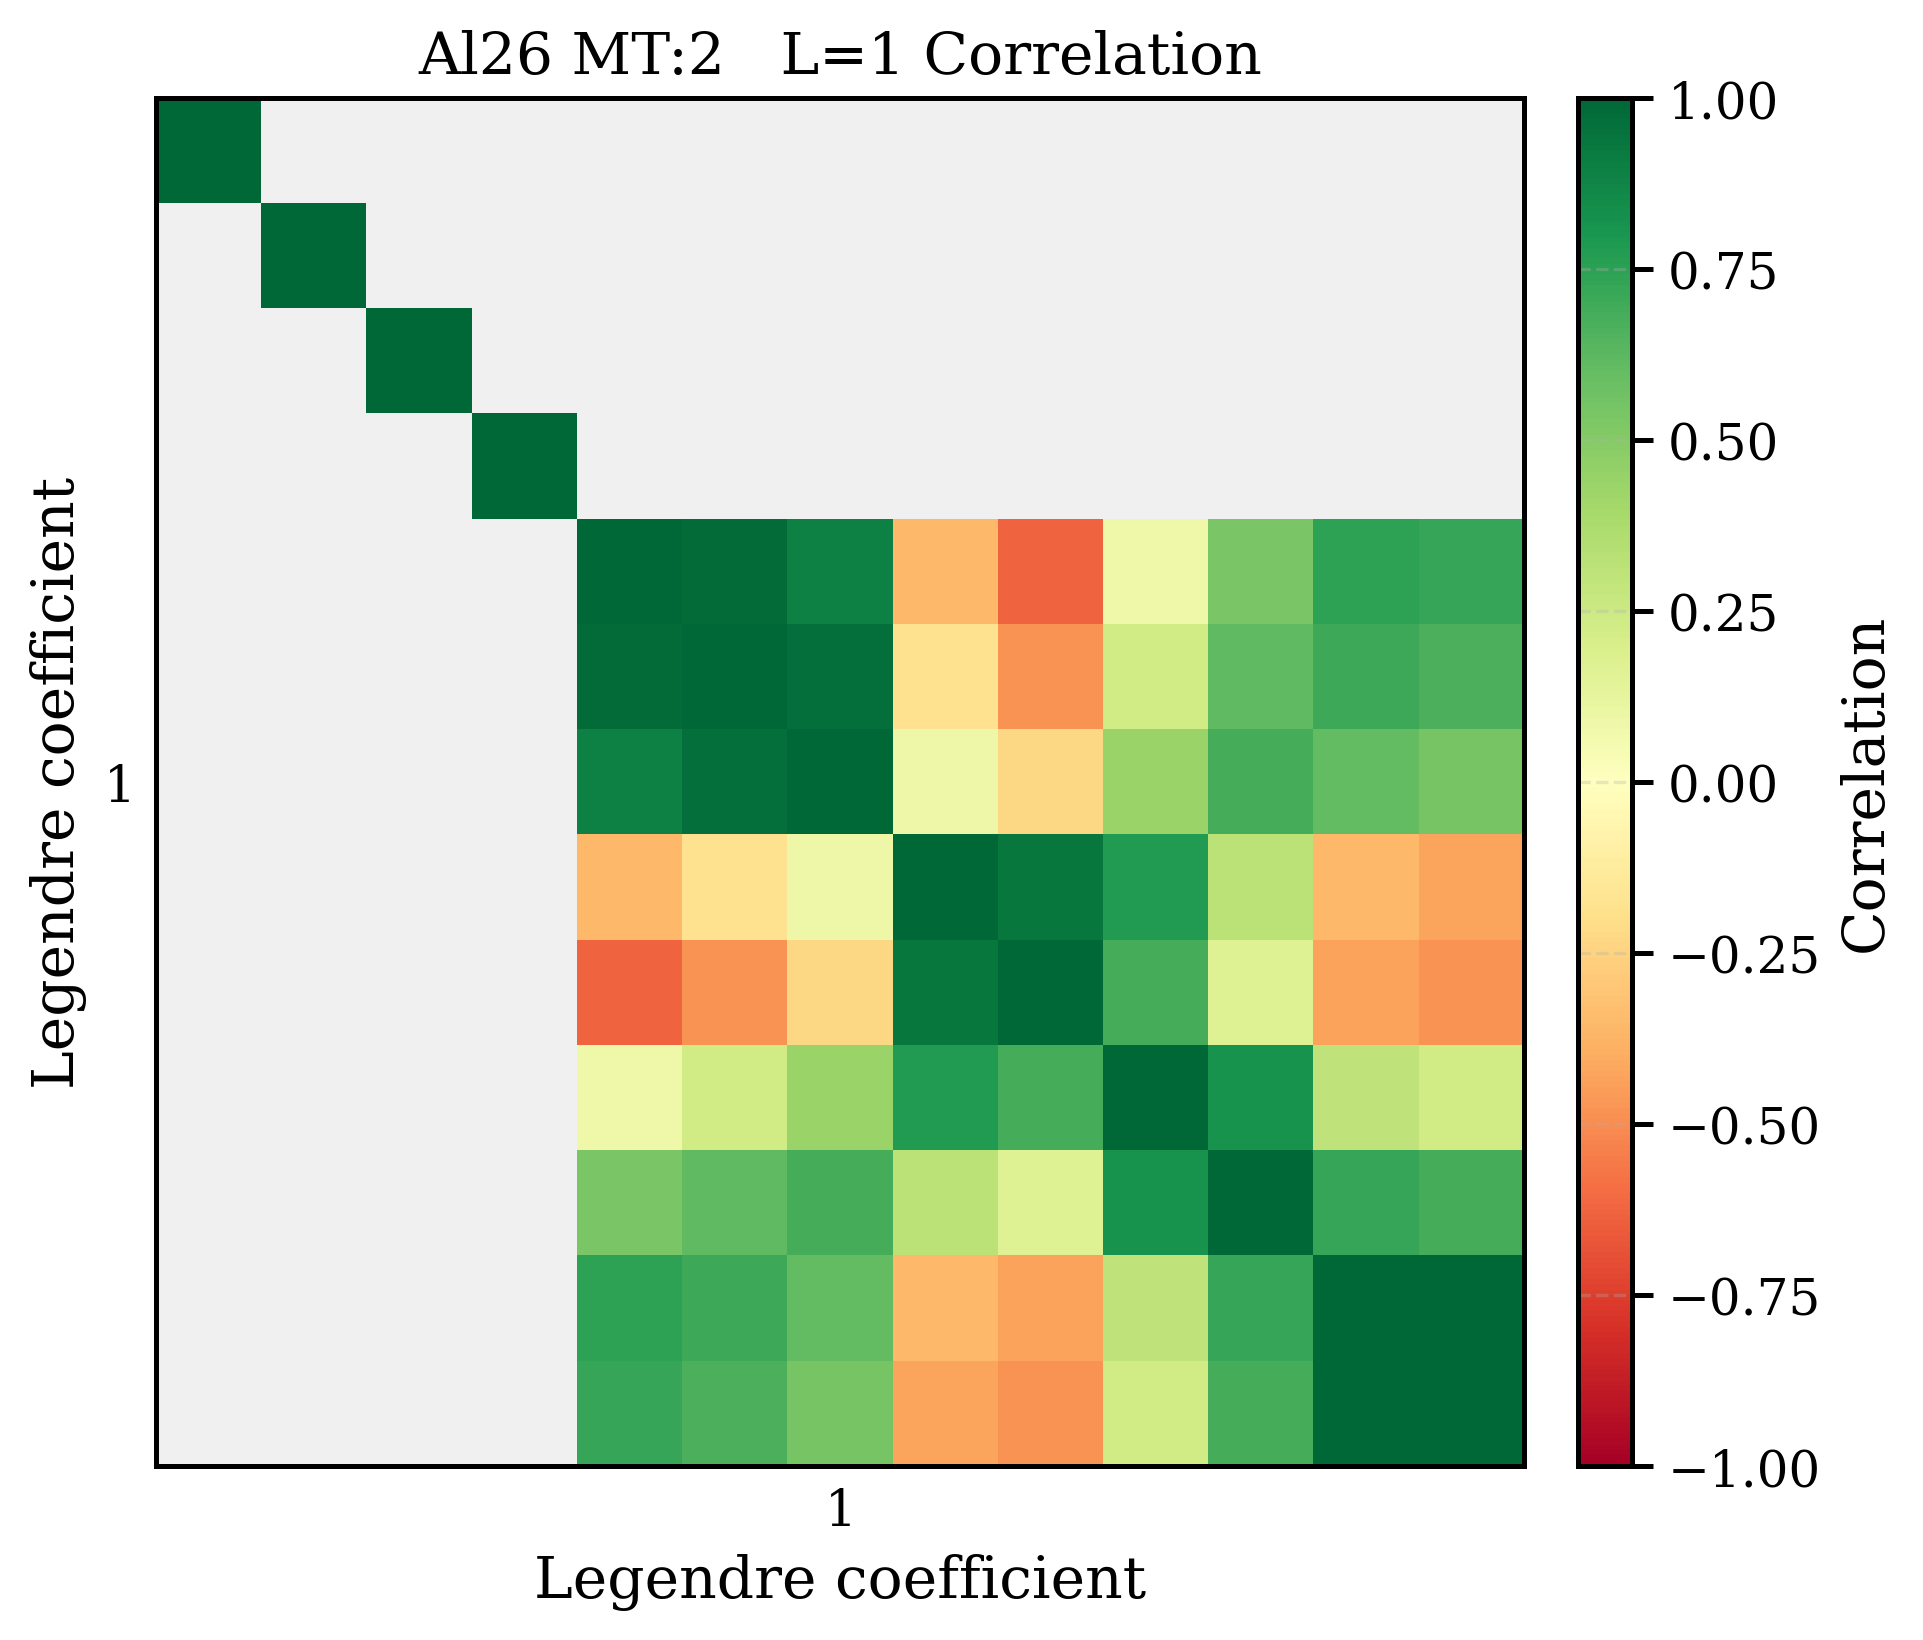

In [7]:
ang_cov.plot_covariance_heatmap(13026, 2, matrix_type='corr', legendre_coeffs=[1], show=False);

In [8]:
ang_cov.to_dataframe()

,ISO_H,REAC_H,L_H,ISO_V,REAC_V,L_V,ENE,STD
0,13026,2,1,13026,2,1,"[1e-05, 1, 300, 6000, 100000, 500000, 1000000,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,13026,2,1,13026,2,2,"[1e-05, 1, 300, 6000, 100000, 500000, 1000000,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,13026,2,1,13026,2,3,"[1e-05, 1, 300, 6000, 100000, 500000, 1000000,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,13026,2,1,13026,2,4,"[1e-05, 1, 300, 6000, 100000, 500000, 1000000,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,13026,2,1,13026,2,5,"[1e-05, 1, 300, 6000, 100000, 500000, 1000000,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,13026,2,1,13026,2,6,"[1e-05, 1, 300, 6000, 100000, 500000, 1000000,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,13026,2,2,13026,2,2,"[1e-05, 1, 300, 6000, 100000, 500000, 1000000,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
7,13026,2,2,13026,2,3,"[1e-05, 1, 300, 6000, 100000, 500000, 1000000,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,13026,2,2,13026,2,4,"[1e-05, 1, 300, 6000, 100000, 500000, 1000000,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9,13026,2,2,13026,2,5,"[1e-05, 1, 300, 6000, 100000, 500000, 1000000,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
